# Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('ggplot')


In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Load Dataset

In [3]:
# import libraries
import pandas as pd
import numpy as np# read csv data
lead_data = pd.read_csv('../LeadsData/Leads.csv')
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# Exploratory Data Analysis

In [4]:
original_rows = lead_data.shape[0]
print('No of original rows: {0}'.format(original_rows))

No of original rows: 9240


In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# rename the columns
lead_data.rename(columns={'Converted':'Converted',
                            'Prospect ID':'ProspectId',
                            'Lead Number':'LeadNumber',
                            'Lead Origin':'LeadOrigin',
                            'Lead Source':'LeadSource',
                            'Do Not Email':'DndEmail',
                            'Do Not Call':'DndCall',
                            'TotalVisits':'TotalVisits',
                            'Total Time Spent on Website':'TotalWebsiteTime',
                            'Page Views Per Visit':'PagesPerVisit',
                            'Last Activity':'LastActivity',
                            'Country':'Country',
                            'Specialization':'Specialization',
                            'How did you hear about X Education':'HowHeard',
                            'What is your current occupation':'Occupation',
                            'What matters most to you in choosing a course':'MattersMost',
                            'Search':'Search',
                            'Magazine':'Magazine',
                            'Newspaper Article':'PaperArticle',
                            'X Education Forums':'EducationForum',
                            'Newspaper':'Newspaper',
                            'Digital Advertisement':'DigitalAd',
                            'Through Recommendations':'Recommendation',
                            'Receive More Updates About Our Courses':'ReceiveCourseUpdate',
                            'Tags':'Tags',
                            'Lead Quality':'LeadQuality',
                            'Update me on Supply Chain Content':'UpdateSupplyChain',
                            'Get updates on DM Content':'UpdateDMContent',
                            'Lead Profile':'LeadProfile',
                            'City':'City',
                            'Asymmetrique Activity Index':'ActivityIndex',
                            'Asymmetrique Profile Index':'ProfileIndex',
                            'Asymmetrique Activity Score':'ActivityScore',
                            'Asymmetrique Profile Score':'ProfileScore',
                            'I agree to pay the amount through cheque':'ChequePayment',
                            'A free copy of Mastering The Interview':'FreeCopy',
                            'Last Notable Activity':'LastNotableActivity'},
                   inplace=True)   


In [7]:
# move target column in front
col_list = list(lead_data.columns)
col_list.insert(0,col_list.pop(col_list.index('Converted')))
lead_data = lead_data.loc[:,col_list]

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9240 non-null   int64  
 1   ProspectId           9240 non-null   object 
 2   LeadNumber           9240 non-null   int64  
 3   LeadOrigin           9240 non-null   object 
 4   LeadSource           9204 non-null   object 
 5   DndEmail             9240 non-null   object 
 6   DndCall              9240 non-null   object 
 7   TotalVisits          9103 non-null   float64
 8   TotalWebsiteTime     9240 non-null   int64  
 9   PagesPerVisit        9103 non-null   float64
 10  LastActivity         9137 non-null   object 
 11  Country              6779 non-null   object 
 12  Specialization       7802 non-null   object 
 13  HowHeard             7033 non-null   object 
 14  Occupation           6550 non-null   object 
 15  MattersMost          6531 non-null   o

## Check null values

In [8]:
pd.DataFrame([[lead_data.shape],
              [lead_data.isnull().sum().sum()],
              [lead_data.duplicated().sum()]],
            columns=['Application Dataset'],
            index=['Shape', 'Missing values','Duplicated'])

Application Dataset
Shape                   (9240, 37)
Missing values               41039
Duplicated                       0

In [9]:
lead_data.head()

Converted                            ProspectId  LeadNumber  \
0          0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737   
1          0  2a272436-5132-4136-86fa-dcc88c88f482      660728   
2          1  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727   
3          0  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719   
4          1  3256f628-e534-4826-9d63-4a8b88782852      660681   

                LeadOrigin      LeadSource DndEmail DndCall  TotalVisits  \
0                      API      Olark Chat       No      No          0.0   
1                      API  Organic Search       No      No          5.0   
2  Landing Page Submission  Direct Traffic       No      No          2.0   
3  Landing Page Submission  Direct Traffic       No      No          1.0   
4  Landing Page Submission          Google       No      No          2.0   

   TotalWebsiteTime  PagesPerVisit             LastActivity Country  \
0                 0            0.0  Page Visited on Website     NaN   
1               674            2.5             Email Opened   India   
2              1532            2.0             Email Opened   India   
3               305            1.0              Unreachable   India   
4              1428            1.0        Converted to Lead   India   

            Specialization       HowHeard  Occupation  \
0                   Select         Select  Unemployed   
1                   Select         Select  Unemployed   
2  Business Administration         Select     Student   
3    Media and Advertising  Word Of Mouth  Unemployed   
4                   Select          Other  Unemployed   

               MattersMost Search Magazine PaperArticle EducationForum  \
0  Better Career Prospects     No       No           No             No   
1  Better Career Prospects     No       No           No             No   
2  Better Career Prospects     No       No           No             No   
3  Better Career Prospects     No       No           No             No   
4  Better Career Prospects     No       No           No             No   

  Newspaper DigitalAd Recommendation ReceiveCourseUpdate  \
0        No        No             No                  No   
1        No        No             No                  No   
2        No        No             No                  No   
3        No        No             No                  No   
4        No        No             No                  No   

                                  Tags       LeadQuality UpdateSupplyChain  \
0          Interested in other courses  Low in Relevance                No   
1                              Ringing               NaN                No   
2  Will revert after reading the email          Might be                No   
3                              Ringing          Not Sure                No   
4  Will revert after reading the email          Might be                No   

  UpdateDMContent     LeadProfile    City ActivityIndex ProfileIndex  \
0              No          Select  Select     02.Medium    02.Medium   
1              No          Select  Select     02.Medium    02.Medium   
2              No  Potential Lead  Mumbai     02.Medium      01.High   
3              No          Select  Mumbai     02.Medium      01.High   
4              No          Select  Mumbai     02.Medium      01.High   

   ActivityScore  ProfileScore ChequePayment FreeCopy LastNotableActivity  
0           15.0          15.0            No       No            Modified  
1           15.0          15.0            No       No        Email Opened  
2           14.0          20.0            No      Yes        Email Opened  
3           13.0          17.0            No       No            Modified  
4           15.0          18.0            No       No            Modified

In [10]:
# There are many columns with value ‘Select’ which is we will treat as null values
lead_data[lead_data == "Select"].count()

Converted                 0
ProspectId                0
LeadNumber                0
LeadOrigin                0
LeadSource                0
DndEmail                  0
DndCall                   0
TotalVisits               0
TotalWebsiteTime          0
PagesPerVisit             0
LastActivity              0
Country                   0
Specialization         1942
HowHeard               5043
Occupation                0
MattersMost               0
Search                    0
Magazine                  0
PaperArticle              0
EducationForum            0
Newspaper                 0
DigitalAd                 0
Recommendation            0
ReceiveCourseUpdate       0
Tags                      0
LeadQuality               0
UpdateSupplyChain         0
UpdateDMContent           0
LeadProfile            4146
City                   2249
ActivityIndex             0
ProfileIndex              0
ActivityScore             0
ProfileScore              0
ChequePayment             0
FreeCopy            

In [11]:
lead_data.replace('Select',np.NaN,inplace=True)
lead_data[lead_data == 'Select'].count()

Converted              0
ProspectId             0
LeadNumber             0
LeadOrigin             0
LeadSource             0
DndEmail               0
DndCall                0
TotalVisits            0
TotalWebsiteTime       0
PagesPerVisit          0
LastActivity           0
Country                0
Specialization         0
HowHeard               0
Occupation             0
MattersMost            0
Search                 0
Magazine               0
PaperArticle           0
EducationForum         0
Newspaper              0
DigitalAd              0
Recommendation         0
ReceiveCourseUpdate    0
Tags                   0
LeadQuality            0
UpdateSupplyChain      0
UpdateDMContent        0
LeadProfile            0
City                   0
ActivityIndex          0
ProfileIndex           0
ActivityScore          0
ProfileScore           0
ChequePayment          0
FreeCopy               0
LastNotableActivity    0
dtype: int64

In [12]:
# check missing values percentage

lead_data[lead_data.columns[lead_data.isnull().any()]].isnull().sum()

LeadSource          36
TotalVisits        137
PagesPerVisit      137
LastActivity       103
Country           2461
Specialization    3380
HowHeard          7250
Occupation        2690
MattersMost       2709
Tags              3353
LeadQuality       4767
LeadProfile       6855
City              3669
ActivityIndex     4218
ProfileIndex      4218
ActivityScore     4218
ProfileScore      4218
dtype: int64

In [13]:
#In terms of missing%
percent_missing = lead_data.isnull().sum() * 100 / len(lead_data)
missing_value_df = pd.DataFrame({'column_name': lead_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
Converted                      Converted         0.000000
ProspectId                    ProspectId         0.000000
LeadNumber                    LeadNumber         0.000000
LeadOrigin                    LeadOrigin         0.000000
LeadSource                    LeadSource         0.389610
DndEmail                        DndEmail         0.000000
DndCall                          DndCall         0.000000
TotalVisits                  TotalVisits         1.482684
TotalWebsiteTime        TotalWebsiteTime         0.000000
PagesPerVisit              PagesPerVisit         1.482684
LastActivity                LastActivity         1.114719
Country                          Country        26.634199
Specialization            Specialization        36.580087
HowHeard                        HowHeard        78.463203
Occupation                    Occupation        29.112554
MattersMost                  MattersMost        29.318182
Search                            Search         0.000000
Magazine                        Magazine         0.000000
PaperArticle                PaperArticle         0.000000
EducationForum            EducationForum         0.000000
Newspaper                      Newspaper         0.000000
DigitalAd                      DigitalAd         0.000000
Recommendation            Recommendation         0.000000
ReceiveCourseUpdate  ReceiveCourseUpdate         0.000000
Tags                                Tags        36.287879
LeadQuality                  LeadQuality        51.590909
UpdateSupplyChain      UpdateSupplyChain         0.000000
UpdateDMContent          UpdateDMContent         0.000000
LeadProfile                  LeadProfile        74.188312
City                                City        39.707792
ActivityIndex              ActivityIndex        45.649351
ProfileIndex                ProfileIndex        45.649351
ActivityScore              ActivityScore        45.649351
ProfileScore                ProfileScore        45.649351
ChequePayment              ChequePayment         0.000000
FreeCopy                        FreeCopy         0.000000
LastNotableActivity  LastNotableActivity         0.000000

In [14]:
### Validate the total sum of missing values
lead_data[lead_data.columns[lead_data.isnull().any()]].isnull().sum().sum()

54419

In [15]:
#Get the list of columns with missing% > 30%
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>30]['column_name'])
missing_data_cols

['Specialization',
 'HowHeard',
 'Tags',
 'LeadQuality',
 'LeadProfile',
 'City',
 'ActivityIndex',
 'ProfileIndex',
 'ActivityScore',
 'ProfileScore']

# Data Cleaning

In [16]:
print('number of columns before dropping high pcnt missing value columns are: {0}'.format(lead_data.shape[1]))
lead_data.drop(columns=missing_data_cols,inplace=True)
print('number of columns after dropping high pcnt missing value columns are: {0}'.format(lead_data.shape[1]))

number of columns before dropping high pcnt missing value columns are: 37
number of columns after dropping high pcnt missing value columns are: 27


## Data imputation

In [17]:
#In terms of missing%
percent_missing = lead_data.isnull().sum() * 100 / len(lead_data)
missing_value_df = pd.DataFrame({'column_name': lead_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
Converted                      Converted         0.000000
ProspectId                    ProspectId         0.000000
LeadNumber                    LeadNumber         0.000000
LeadOrigin                    LeadOrigin         0.000000
LeadSource                    LeadSource         0.389610
DndEmail                        DndEmail         0.000000
DndCall                          DndCall         0.000000
TotalVisits                  TotalVisits         1.482684
TotalWebsiteTime        TotalWebsiteTime         0.000000
PagesPerVisit              PagesPerVisit         1.482684
LastActivity                LastActivity         1.114719
Country                          Country        26.634199
Occupation                    Occupation        29.112554
MattersMost                  MattersMost        29.318182
Search                            Search         0.000000
Magazine                        Magazine         0.000000
PaperArticle                PaperArticle         0.000000
EducationForum            EducationForum         0.000000
Newspaper                      Newspaper         0.000000
DigitalAd                      DigitalAd         0.000000
Recommendation            Recommendation         0.000000
ReceiveCourseUpdate  ReceiveCourseUpdate         0.000000
UpdateSupplyChain      UpdateSupplyChain         0.000000
UpdateDMContent          UpdateDMContent         0.000000
ChequePayment              ChequePayment         0.000000
FreeCopy                        FreeCopy         0.000000
LastNotableActivity  LastNotableActivity         0.000000

In [18]:
#Get the list of columns with missing% > 2%
percent_missing = lead_data.isnull().sum() * 100 / len(lead_data)
missing_value_df = pd.DataFrame({'column_name': lead_data.columns,
                                 'percent_missing': percent_missing})
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>2]['column_name'])
print('No of columns with data value missing pect > 2% are: {0}'.format(len(missing_data_cols)))
missing_data_cols

No of columns with data value missing pect > 2% are: 3


['Country', 'Occupation', 'MattersMost']

### Function to plot frequency and percentage wrt feature

In [19]:
def plot_frequency_and_percentage(feature,leads_df,category_df,another_row=False,height=8,ylabels=[]):
    
    if another_row:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,height*2))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    
    ## plot the frequency plot for each category in the required column
    ax1.set_title('Frequency Plot of {0}'.format(feature),color='blue')
    ax1.set_ylabel(feature) 
    ax1.set_xlabel('count')
    sns.countplot(y=feature,data=category_df.sort_values(by=feature),ax=ax1,color='green');
    if len(ylabels)>0:
        ax1.set_yticklabels(ylabels);
    
    ## plot the value percentage in each sub-category wrt the label
    ax2.set_title('Lead Converted label %',color='blue')
    ax2.set_ylabel(feature) 
    ax2.set_xlabel('percentage')
    leads_df.iloc[1].sort_values().plot(kind='barh',ax=ax2,color='orange');
    if len(ylabels)>0:
        ax2.set_yticklabels(ylabels)

In [20]:
# Lets check for column Country
lead_data['Country'].value_counts()


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

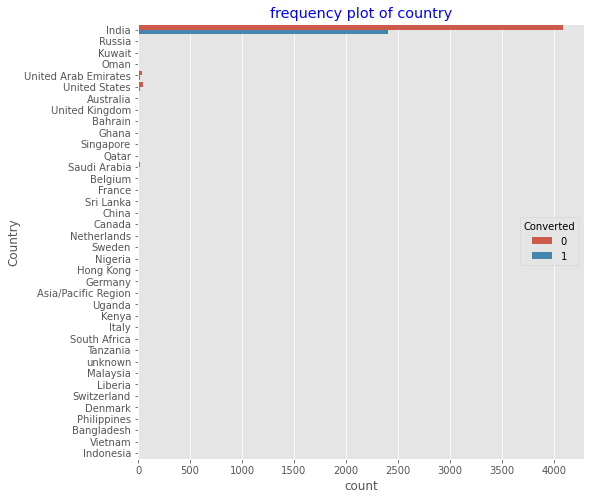

In [21]:
plt.figure(figsize=(8,8))
plt.title('frequency plot of country',color='blue')
sns.countplot(y='Country',hue='Converted',data=lead_data);

In [22]:
print('number of columns before dropping column "Country" are: {0}'.format(lead_data.shape[1]))
lead_data.drop(columns=['Country'],inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(lead_data.shape[1]))

number of columns before dropping column "Country" are: 27
number of columns after dropping column "Country" are: 26


In [23]:
#Lets check for column Occupation

lead_data['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

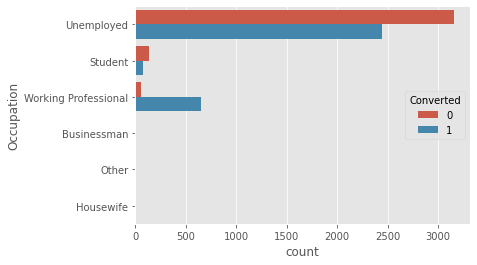

In [24]:
sns.countplot(y='Occupation',hue='Converted',data=lead_data);

In [25]:
lead_data['Occupation'].isnull().sum()

2690

In [26]:
#replace null values with value 'Unemployed' in leadscore_df
print('Number of observations with null values in column Occupation: {0}'.format(
    lead_data['Occupation'].isnull().sum()))

lead_data['Occupation'].replace({np.NaN:'Other'},inplace=True)
print('Number of observations with null values in column Occupation after imputation: {0}'.format(
    lead_data['Occupation'].isnull().sum()))

Number of observations with null values in column Occupation: 2690
Number of observations with null values in column Occupation after imputation: 0


In [27]:
 # Lets check for column MattersMost
lead_data['MattersMost'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: MattersMost, dtype: int64

In [28]:
lead_data['MattersMost'].isnull().sum()

2709

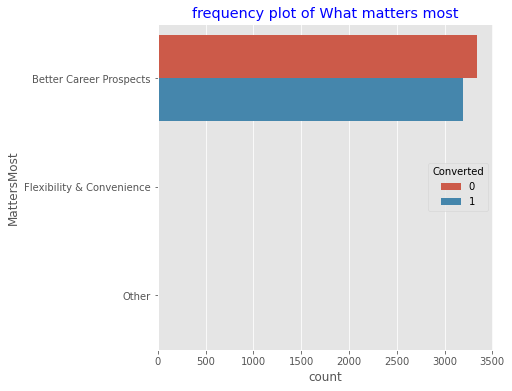

In [29]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of What matters most',color='blue')
sns.countplot(y='MattersMost',hue='Converted',data=lead_data);

In [30]:
print('number of columns before dropping column "MattersMost" are: {0}'.format(lead_data.shape[1]))
lead_data.drop(columns=['MattersMost'],inplace=True)
print('number of columns after dropping column "MattersMost" are: {0}'.format(lead_data.shape[1]))

number of columns before dropping column "MattersMost" are: 26
number of columns after dropping column "MattersMost" are: 25


In [31]:
# Now lets check for missing values with missing value percentage > 0
#Get the list of columns with missing% > 0%
percent_missing = lead_data.isnull().sum() * 100 / len(lead_data)
missing_value_df = pd.DataFrame({'column_name': lead_data.columns,
                                 'percent_missing': percent_missing})
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])
print('No of columns with data value missing prct are: {0}'.format(len(missing_data_cols)))
missing_data_cols

No of columns with data value missing prct are: 4


['LeadSource', 'TotalVisits', 'PagesPerVisit', 'LastActivity']

In [32]:
missing_value_df[missing_value_df['percent_missing']>0]

column_name  percent_missing
LeadSource        LeadSource         0.389610
TotalVisits      TotalVisits         1.482684
PagesPerVisit  PagesPerVisit         1.482684
LastActivity    LastActivity         1.114719

In [33]:
# Lets check for column LeadSource
lead_data['LeadSource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: LeadSource, dtype: int64

In [34]:
print('number of observations with value google: {0}'.format(
    lead_data[lead_data['LeadSource']=='google']['LeadSource'].count()))
lead_data['LeadSource'].replace('google','Google',inplace=True)
print('number of observations with value google: {0}'.format(
    lead_data[lead_data['LeadSource']=='google']['LeadSource'].count()))

number of observations with value google: 5
number of observations with value google: 0


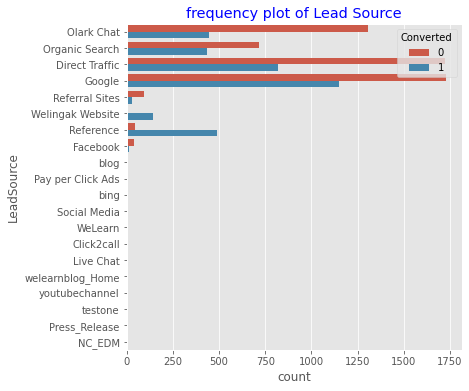

In [35]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Source',color='blue')
sns.countplot(y='LeadSource',hue='Converted',data=lead_data);

In [36]:
# Since below categories have very less observations so lets combine the below categories and create new category value - Others
lead_data['LeadSource'] = lead_data['LeadSource'].replace(
    ['bing','google','Click2call','Social Media','Press_Release','Live Chat','WeLearn','youtubechannel',
     'welearnblog_Home','NC_EDM','testone','Pay per Click Ads','blog'],'Others')
lead_data['LeadSource'].value_counts()


Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: LeadSource, dtype: int64

In [37]:
lead_data['LeadSource'].isnull().sum()

36

In [38]:
## replace null values with most frequent value
print('Number of observations with null values in column LeadSource: {0}'.format(
    lead_data['LeadSource'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data[['LeadSource']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data['LeadSource'] = imp.transform(lead_data[['LeadSource']]).ravel()

print('Number of observations with null values in column LeadSource after imputation: {0}'.format(
    lead_data['LeadSource'].isnull().sum()))

Number of observations with null values in column LeadSource: 36
Most frequent value is : Google
Number of observations with null values in column LeadSource after imputation: 0


## Checking outliers

In [39]:

lead_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [40]:
lead_data['TotalVisits'].isnull().sum()

137

In [41]:
lead_data.shape

(9240, 25)

### Since its a numeric feature so lets also check mean, median, std etc.


In [42]:

totalvisits_med = lead_data['TotalVisits'].median()
totalvisits_med

3.0

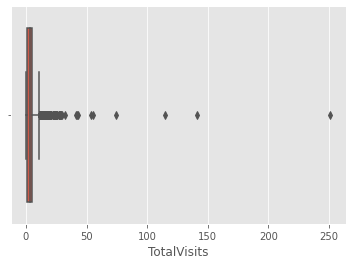

In [43]:

sns.boxplot(lead_data['TotalVisits']);

In [44]:
#replace null values with value 3.0 in leadTotalVisits_df
print('Number of observations with null values in column TotalVisits: {0}'.format(
    lead_data['TotalVisits'].isnull().sum()))
lead_data['TotalVisits'].replace({np.NaN:totalvisits_med},inplace=True)
print('Number of observations with null values in column TotalVisits after imputation: {0}'.format(
    lead_data['TotalVisits'].isnull().sum()))

Number of observations with null values in column TotalVisits: 137
Number of observations with null values in column TotalVisits after imputation: 0


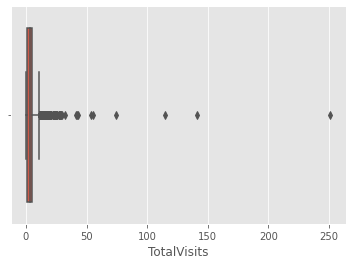

In [45]:

sns.boxplot(lead_data['TotalVisits']);

In [46]:
lead_data['TotalVisits'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

TotalVisits 99th percentile value: 17.0


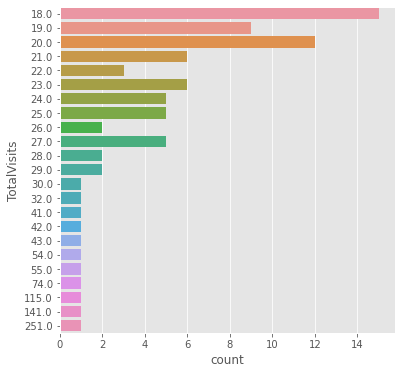

In [47]:
print('TotalVisits 99th percentile value: {0}'.format(lead_data['TotalVisits'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=lead_data[lead_data['TotalVisits']>17]['TotalVisits'].sort_values());

In [48]:
lead_data[lead_data['TotalVisits']>55]['TotalVisits'].count()

4

In [49]:
# Lets drop these 4 rows where TotalVisits>55


print('shape of dataframe before dropping rows: {0}'.format(lead_data.shape))
print('Total number of rows to be dropped: {0}'.format(
    lead_data[lead_data['TotalVisits']>55]['TotalVisits'].count()))
lead_data.drop(index=lead_data[lead_data['TotalVisits']>55].index,inplace=True)
print('shape of dataframe after dropping rows: {0}'.format(lead_data.shape))

shape of dataframe before dropping rows: (9240, 25)
Total number of rows to be dropped: 4
shape of dataframe after dropping rows: (9236, 25)


In [50]:
#  Lets check for column PagesPerVisit
lead_data['PagesPerVisit'].value_counts()


0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.20        9
4.33        9
14.00       9
2.80        9
2.17        8
1.60        8
3.25        8
13.00       6
2.40        6
12.00       5
1.20        5
1.43        4
2.60        4
15.00       4
1.83        4
3.40        4
1.71        4
4.25        3
1.38        3
5.67        3
16.00       3
1.78        3
4.75        3
1.57        3
7.50        2
1.23        2
1.14        2
2.71        2
1.22        2
3.75        2
5.40        2
1.56        2
2.83        2
2.09        2
3.60        2
3.20        2
2.22        2
5.33        2
5.25        2
1.93        1
4.17        1
11.50 

In [51]:
lead_data['PagesPerVisit'].isnull().sum()

137

In [52]:
# Since its a numeric feature so lets also check mean, median, std etc.

pagesvist_med = lead_data['PagesPerVisit'].median()
pagesvist_med

2.0

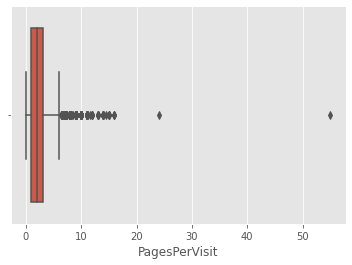

In [53]:

sns.boxplot(lead_data['PagesPerVisit']);

In [54]:
lead_data['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9099.000000
mean        2.360701
std         2.157994
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: PagesPerVisit, dtype: float64

Observations from above cell
As can be seen there are 137 observations where value is missing for column PagesPerVisit
Because of the presence of outliers we will replace the missing values with median instead of mean

In [55]:
#replace null values with value 2.0 in leadPagesPerVisit_df
print('Number of observations with null values in column PagesPerVisit: {0}'.format(
    lead_data['PagesPerVisit'].isnull().sum()))
lead_data['PagesPerVisit'].replace({np.NaN:pagesvist_med},inplace=True)
print('Number of observations with null values in column PagesPerVisit: {0}'.format(
    lead_data['PagesPerVisit'].isnull().sum()))

Number of observations with null values in column PagesPerVisit: 137
Number of observations with null values in column PagesPerVisit: 0


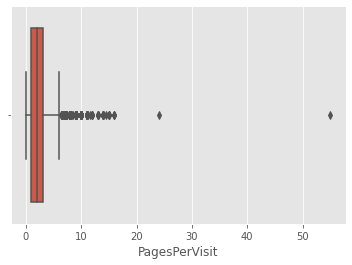

In [56]:
sns.boxplot(lead_data['PagesPerVisit']);

In [57]:
lead_data['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9236.000000
mean        2.355351
std         2.142371
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: PagesPerVisit, dtype: float64

TotalVisits 99th percentile value: 9.0


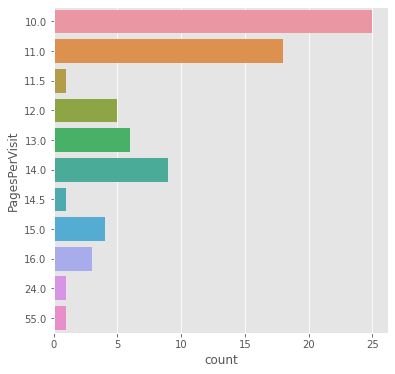

In [58]:

print('TotalVisits 99th percentile value: {0}'.format(lead_data['PagesPerVisit'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=lead_data[lead_data['PagesPerVisit']>9]['PagesPerVisit'].sort_values());

In [59]:
lead_data[lead_data['PagesPerVisit']>16]['PagesPerVisit'].count()

2

In [60]:
# Lets drop these 2 rows where PagesPerVisit>16


print('shape of dataframe before dropping rows: {0}'.format(lead_data.shape))
print('Total number of rows to be dropped: {0}'.format(
    lead_data[lead_data['PagesPerVisit']>16]['PagesPerVisit'].count()))
lead_data.drop(index=lead_data[lead_data['PagesPerVisit']>16].index,inplace=True)
print('shape of dataframe after dropping rows: {0}'.format(lead_data.shape))

shape of dataframe before dropping rows: (9236, 25)
Total number of rows to be dropped: 2
shape of dataframe after dropping rows: (9234, 25)


In [61]:
# Lets check for column LastActivity

lead_data['LastActivity'].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          634
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: LastActivity, dtype: int64

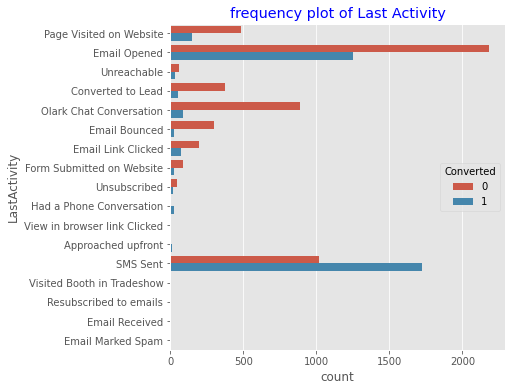

In [62]:

plt.figure(figsize=(6,6))
plt.title('frequency plot of Last Activity',color='blue')
sns.countplot(y='LastActivity',hue='Converted',data=lead_data);

### Since below categories have very less observations so lets combine the below categories and create new category value - Others

In [63]:
lead_data['LastActivity'] = lead_data['LastActivity'].replace(
    ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
     'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')
lead_data['LastActivity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       634
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

In [64]:
lead_data['LastActivity'].isnull().sum()

103

In [65]:
## replace null values
print('Number of observations with null values in column LastActivity: {0}'.format(
    lead_data['LastActivity'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data[['LastActivity']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data['LastActivity'] = imp.transform(lead_data[['LastActivity']]).ravel()

print('Number of observations with null values in column LastActivity after imputation: {0}'.format(
    lead_data['LastActivity'].isnull().sum()))

Number of observations with null values in column LastActivity: 103
Most frequent value is : Email Opened
Number of observations with null values in column LastActivity after imputation: 0


In [66]:
## Check for information now
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9234 non-null   int64  
 1   ProspectId           9234 non-null   object 
 2   LeadNumber           9234 non-null   int64  
 3   LeadOrigin           9234 non-null   object 
 4   LeadSource           9234 non-null   object 
 5   DndEmail             9234 non-null   object 
 6   DndCall              9234 non-null   object 
 7   TotalVisits          9234 non-null   float64
 8   TotalWebsiteTime     9234 non-null   int64  
 9   PagesPerVisit        9234 non-null   float64
 10  LastActivity         9234 non-null   object 
 11  Occupation           9234 non-null   object 
 12  Search               9234 non-null   object 
 13  Magazine             9234 non-null   object 
 14  PaperArticle         9234 non-null   object 
 15  EducationForum       9234 non-null   o

### All null values have been treated

In [67]:
lead_data.nunique()

Converted                 2
ProspectId             9234
LeadNumber             9234
LeadOrigin                5
LeadSource                9
DndEmail                  2
DndCall                   2
TotalVisits              36
TotalWebsiteTime       1730
PagesPerVisit           108
LastActivity              9
Occupation                6
Search                    2
Magazine                  1
PaperArticle              2
EducationForum            2
Newspaper                 2
DigitalAd                 2
Recommendation            2
ReceiveCourseUpdate       1
UpdateSupplyChain         1
UpdateDMContent           1
ChequePayment             1
FreeCopy                  2
LastNotableActivity      16
dtype: int64

## Drop columns with only one categorical value

In [68]:
# Lets Check for columns with only one unique value

lead_data['Magazine'].value_counts()

No    9234
Name: Magazine, dtype: int64

In [69]:
lead_data['ReceiveCourseUpdate'].value_counts()

No    9234
Name: ReceiveCourseUpdate, dtype: int64

In [70]:
lead_data['UpdateSupplyChain'].value_counts()

No    9234
Name: UpdateSupplyChain, dtype: int64

In [71]:
lead_data['UpdateDMContent'].value_counts()

No    9234
Name: UpdateDMContent, dtype: int64

In [72]:
lead_data['ChequePayment'].value_counts()

No    9234
Name: ChequePayment, dtype: int64

### Observation from above cells
#### Since below listed columns dont add any variance in data so it wont be helpful in modeling. Based on this we can drop these columns
##### * Magazine
##### * ReceiveCourseUpdate
##### * UpdateSupplyChain
##### * UpdateDMContent
##### * ChequePayment

In [73]:
print('number of columns before dropping column "Country" are: {0}'.format(lead_data.shape[1]))
lead_data.drop(columns=['Magazine','ReceiveCourseUpdate','UpdateSupplyChain','UpdateDMContent',
                           'ChequePayment'], inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(lead_data.shape[1]))

number of columns before dropping column "Country" are: 25
number of columns after dropping column "Country" are: 20


In [74]:
print('number of columns before dropping column "Country" are: {0}'.format(lead_data.shape[1]))
lead_data.drop(columns=['DndCall','Search','PaperArticle','EducationForum','Newspaper',
                           'DigitalAd','Recommendation'],inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(lead_data.shape[1]))

number of columns before dropping column "Country" are: 20
number of columns after dropping column "Country" are: 13


#### Percentage of data retained after data cleaning

In [75]:
(lead_data.shape[0]/original_rows)*100

99.93506493506493

## Data Preparation for modeling

In [76]:
# LeadNumber and ProspectId are case identifiers and dont add much value to modelling so will drop these columns
print('No. of columns before dropping 2 columns: {0}'.format(lead_data.shape[1]))
lead_data.drop(columns = ['ProspectId','LeadNumber'],inplace=True)
print('No. of columns after dropping 2 columns: {0}'.format(lead_data.shape[1]))


No. of columns before dropping 2 columns: 13
No. of columns after dropping 2 columns: 11


In [77]:
# Lets do get_dummies for all the categorical columns

lead_data.head()

Converted               LeadOrigin      LeadSource DndEmail  TotalVisits  \
0          0                      API      Olark Chat       No          0.0   
1          0                      API  Organic Search       No          5.0   
2          1  Landing Page Submission  Direct Traffic       No          2.0   
3          0  Landing Page Submission  Direct Traffic       No          1.0   
4          1  Landing Page Submission          Google       No          2.0   

   TotalWebsiteTime  PagesPerVisit             LastActivity  Occupation  \
0                 0            0.0  Page Visited on Website  Unemployed   
1               674            2.5             Email Opened  Unemployed   
2              1532            2.0             Email Opened     Student   
3               305            1.0                   Others  Unemployed   
4              1428            1.0        Converted to Lead  Unemployed   

  FreeCopy LastNotableActivity  
0       No            Modified  
1       No        Email Opened  
2      Yes        Email Opened  
3       No            Modified  
4       No            Modified

In [78]:
# First make subset of dataframes based on datatype - object and numerical

object_cols = [col for col in lead_data.select_dtypes(include=np.object).columns]

numerical_cols = [col for col in lead_data.select_dtypes(include=np.number).columns]

print('Categorical Columns: \n{0}\n'.format(object_cols))
print('Numerical Columns: \n{0}'.format(numerical_cols))
            

Categorical Columns: 
['LeadOrigin', 'LeadSource', 'DndEmail', 'LastActivity', 'Occupation', 'FreeCopy', 'LastNotableActivity']

Numerical Columns: 
['Converted', 'TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit']


In [79]:
## Remove Converted from Numerical Columns list
numerical_cols.remove('Converted')
numerical_cols

['TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit']

## Apply get_dummies

In [80]:
#one hot encoding for categorical variables
lead_data = pd.get_dummies(data=lead_data, columns=object_cols, drop_first=True)
lead_data.sample(10)

Converted  TotalVisits  TotalWebsiteTime  PagesPerVisit  \
6173          0          3.0               383            1.0   
7472          1          2.0              1386            2.0   
2991          0          3.0               323            3.0   
1348          0          0.0                 0            0.0   
3787          0          0.0                 0            0.0   
789           1          8.0              1148            4.0   
4357          0          0.0                 0            0.0   
7608          0          9.0               285            4.5   
7257          0          3.0              1613            3.0   
1763          0          3.0               271            3.0   

      LeadOrigin_Landing Page Submission  LeadOrigin_Lead Add Form  \
6173                                   0                         0   
7472                                   1                         0   
2991                                   1                         0   
1348                                   0                         0   
3787                                   0                         0   
789                                    1                         0   
4357                                   0                         0   
7608                                   1                         0   
7257                                   1                         0   
1763                                   0                         0   

      LeadOrigin_Lead Import  LeadOrigin_Quick Add Form  LeadSource_Facebook  \
6173                       0                          0                    0   
7472                       0                          0                    0   
2991                       0                          0                    0   
1348                       0                          0                    0   
3787                       0                          0                    0   
789                        0                          0                    0   
4357                       0                          0                    0   
7608                       0                          0                    0   
7257                       0                          0                    0   
1763                       0                          0                    0   

      LeadSource_Google  LeadSource_Olark Chat  LeadSource_Organic Search  \
6173                  1                      0                          0   
7472                  0                      0                          0   
2991                  1                      0                          0   
1348                  0                      1                          0   
3787                  0                      1                          0   
789                   1                      0                          0   
4357                  0                      1                          0   
7608                  0                      0                          1   
7257                  0                      0                          0   
1763                  1                      0                          0   

      LeadSource_Others  LeadSource_Reference  LeadSource_Referral Sites  \
6173                  0                     0                          0   
7472                  0                     0                          0   
2991                  0                     0                          0   
1348                  0                     0                          0   
3787                  0                     0                          0   
789                   0                     0                          0   
4357                  0                     0                          0   
7608                  0                     0                          0   
7257                  0                     0                          0   
1763                  0       

## Check Correlation

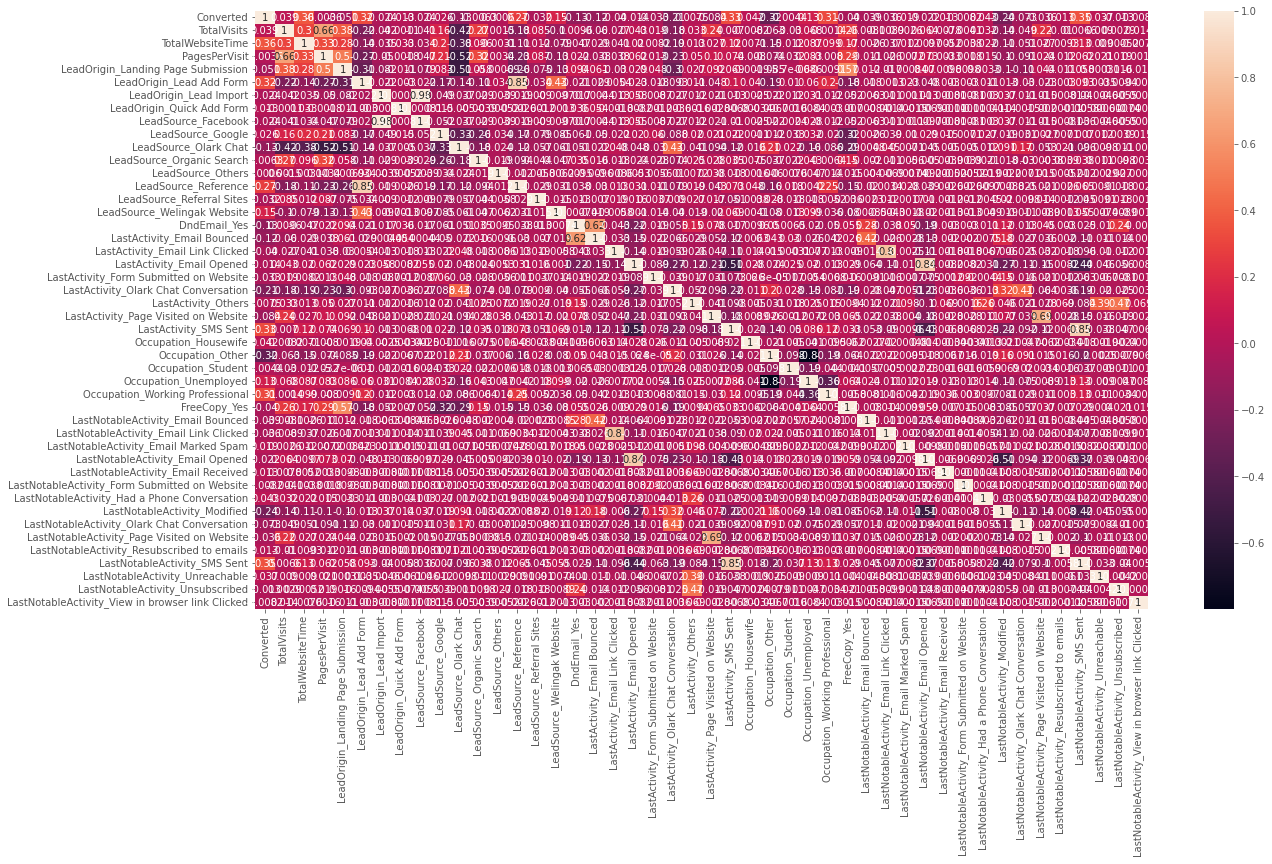

In [81]:
plt.figure(figsize=(20,11))
sns.heatmap(lead_data.corr(),annot=True);

In [82]:
leadscore_corr = lead_data.corr()
leadscore_corr.style.apply(lambda x: 
                           ["background: lightblue" if abs(v) > 0.5
                            else  
                            ("background: lightyellow" if abs(v) > 0.3 
                             else "" ) for v in x], axis = 1)
#leadscore_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)

Observations from above correlation map
TotalWebsiteTime, LeadOrigin_Lead Add Form, LastActivity_SMS Sent, Occupation_Working Professional, LastNotableActivity_SMS Sent features have positive correlation with target variable Converted
There are many dummy variables that are correlated with each other

## Divide into X and Y for model building

In [83]:
X = lead_data.drop(columns = ['Converted'])
y = lead_data['Converted']

## Train - Test Split

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
X_train.head()

TotalVisits  TotalWebsiteTime  PagesPerVisit  \
7417          2.0              1601            2.0   
1032          6.0              1377            6.0   
6537          4.0               313            4.0   
7284          4.0               104            2.0   
3194          0.0                 0            0.0   

      LeadOrigin_Landing Page Submission  LeadOrigin_Lead Add Form  \
7417                                   1                         0   
1032                                   1                         0   
6537                                   0                         0   
7284                                   0                         0   
3194                                   0                         1   

      LeadOrigin_Lead Import  LeadOrigin_Quick Add Form  LeadSource_Facebook  \
7417                       0                          0                    0   
1032                       0                          0                    0   
6537                       0                          0                    0   
7284                       0                          0                    0   
3194                       0                          0                    0   

      LeadSource_Google  LeadSource_Olark Chat  LeadSource_Organic Search  \
7417                  0                      0                          0   
1032                  0                      0                          0   
6537                  0                      0                          1   
7284                  0                      0                          1   
3194                  0                      0                          0   

      LeadSource_Others  LeadSource_Reference  LeadSource_Referral Sites  \
7417                  0                     0                          0   
1032                  0                     0                          0   
6537                  0                     0                          0   
7284                  0                     0                          0   
3194                  0                     1                          0   

      LeadSource_Welingak Website  DndEmail_Yes  LastActivity_Email Bounced  \
7417                            0             0                           0   
1032                            0             0                           0   
6537                            0             0                           0   
7284                            0             0                           0   
3194                            0             0                           0   

      LastActivity_Email Link Clicked  LastActivity_Email Opened  \
7417                                0                          0   
1032                                0                          0   
6537                                0                          0   
7284                                0                          1   
3194                                0                          1   

      LastActivity_Form Submitted on Website  \
7417                                       0   
1032                                       0   
6537                                       0   
7284                                       0   
3194                                       0   

      LastActivity_Olark Chat Conversation  LastActivity_Others  \
7417                                     0                    0   
1032                                     0                    0   
6537                                     0                    0   
7284                                     0                    0   
3194                                     0                    0   

      LastActivity_Page Visited on Website  LastActivity_SMS Sent  \
7417                                     0                      1   
1032                                     0                      1   
6537                                     0                      1   
7284   

In [222]:
X_train_scaled[numerical_cols]

TotalVisits  TotalWebsiteTime  PagesPerVisit
7417        -0.39              2.03          -0.17
1032         0.76              1.62           1.77
6537         0.19             -0.32           0.80
7284         0.19             -0.70          -0.17
3194        -0.97             -0.89          -1.14
712         -0.68             -0.61          -0.65
3947         0.19             -0.66          -0.17
3436        -0.39              0.42          -0.65
6609         1.05             -0.52           2.26
8013        -0.39             -0.51          -0.17
6080         0.48              1.12           0.08
3665        -0.10              1.42           0.32
1050        -0.39              1.10          -0.17
8706        -0.97             -0.89          -1.14
3962        -0.97             -0.89          -1.14
6162         0.19              1.76           0.80
6710         0.19             -0.89           0.80
2175         1.34             -0.64           0.80
8231         0.48             -0.83           1.29
8886        -0.39              1.48          -0.65
8690        -0.97             -0.89          -1.14
3686        -0.10             -0.16           0.32
2914        -0.39              1.15          -0.17
2714         1.34              1.82           2.75
499         -0.97             -0.89          -1.14
8329        -0.97             -0.89          -1.14
504          0.19              2.10           0.80
4985         0.48             -0.16           1.29
8963        -0.10             -0.40          -0.41
1835        -0.68             -0.54          -0.65
1756        -0.10              1.54           0.32
3049         0.19             -0.40          -0.17
6436        -0.97             -0.89          -1.14
498          0.19             -0.49           0.80
6915         0.19             -0.63          -0.17
3206        -0.39             -0.69          -0.17
6965         3.94             -0.28           1.61
4071         3.07              1.02          -0.46
4773        -0.97             -0.89          -1.14
6190        -0.97             -0.89          -1.14
8368        -0.39             -0.55          -0.17
3904        -0.10              1.43           0.32
8946         1.92              1.59           0.08
5900        -0.97             -0.89          -1.14
8539         0.19              1.65           0.80
2197        -0.10              0.46           0.32
1599        -0.39             -0.11          -0.17
7234        -0.68              1.04          -0.65
4641        -0.39             -0.69          -0.17
8557        -0.97             -0.89          -1.14
7743        -0.97             -0.89          -1.14
5060        -0.97             -0.89          -1.14
8190        -0.97             -0.89          -1.14
5389        -0.39              1.52          -0.17
2279         0.19             -0.09           0.80
8752         1.05             -0.16           2.26
2716         0.48              2.16           1.29
561         -0.10              2.10           0.32
936         -0.39              2.00          -0.17
3882         1.05             -0.42          -0.01
4545         3.65             -0.44          -0.43
6038         0.19             -0.41           0.80
8698        -0.68             -0.06          -0.65
6717        -0.10              0.27          -0.41
3124         0.19             -0.24           0.80
2442        -0.39             -0.16          -0.17
543          1.05             -0.65           0.56
455         -0.39             -0.81          -0.17
5068         0.19              1.48          -0.17
6944        -0.39              1.96          -0.17
7033        -0.97             -0.89          -1.14
8295        -0.97             -0.89          -1.14
6215        -0.39              1.75          -0.17
1412        -0.10             -0.64          -0.41
4807        -0.39              1.63          -0.17
7811        -0.39              0.84          -0.17
8773         0.48             -0.80           1.29
4770        -0.39           

## Feature Scaling

### Apply StandardScalar on all continuous numerical features

In [220]:

sc = StandardScaler()
#sc = MinMaxScaler()

#Create X_train_scaled, X_test_scaled
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Fit and transform Train
X_train_scaled[numerical_cols] = sc.fit_transform(X_train[numerical_cols])

#Transform Test (No Fit)
X_test_scaled[numerical_cols] = sc.transform(X_test[numerical_cols])

In [223]:
X_train_scaled.head()

TotalVisits  TotalWebsiteTime  PagesPerVisit  \
7417        -0.39              2.03          -0.17   
1032         0.76              1.62           1.77   
6537         0.19             -0.32           0.80   
7284         0.19             -0.70          -0.17   
3194        -0.97             -0.89          -1.14   

      LeadOrigin_Landing Page Submission  LeadOrigin_Lead Add Form  \
7417                                   1                         0   
1032                                   1                         0   
6537                                   0                         0   
7284                                   0                         0   
3194                                   0                         1   

      LeadOrigin_Lead Import  LeadOrigin_Quick Add Form  LeadSource_Facebook  \
7417                       0                          0                    0   
1032                       0                          0                    0   
6537                       0                          0                    0   
7284                       0                          0                    0   
3194                       0                          0                    0   

      LeadSource_Google  LeadSource_Olark Chat  LeadSource_Organic Search  \
7417                  0                      0                          0   
1032                  0                      0                          0   
6537                  0                      0                          1   
7284                  0                      0                          1   
3194                  0                      0                          0   

      LeadSource_Others  LeadSource_Reference  LeadSource_Referral Sites  \
7417                  0                     0                          0   
1032                  0                     0                          0   
6537                  0                     0                          0   
7284                  0                     0                          0   
3194                  0                     1                          0   

      LeadSource_Welingak Website  DndEmail_Yes  LastActivity_Email Bounced  \
7417                            0             0                           0   
1032                            0             0                           0   
6537                            0             0                           0   
7284                            0             0                           0   
3194                            0             0                           0   

      LastActivity_Email Link Clicked  LastActivity_Email Opened  \
7417                                0                          0   
1032                                0                          0   
6537                                0                          0   
7284                                0                          1   
3194                                0                          1   

      LastActivity_Form Submitted on Website  \
7417                                       0   
1032                                       0   
6537                                       0   
7284                                       0   
3194                                       0   

      LastActivity_Olark Chat Conversation  LastActivity_Others  \
7417                                     0                    0   
1032                                     0                    0   
6537                                     0                    0   
7284                                     0                    0   
3194                                     0                    0   

      LastActivity_Page Visited on Website  LastActivity_SMS Sent  \
7417                                     0                      1   
1032                                     0                      1   
6537                                     0                      1   
7284   

In [88]:
## get features list first and remove target column from features list
features = [col for col in lead_data if col!='Converted']
features

['TotalVisits',
 'TotalWebsiteTime',
 'PagesPerVisit',
 'LeadOrigin_Landing Page Submission',
 'LeadOrigin_Lead Add Form',
 'LeadOrigin_Lead Import',
 'LeadOrigin_Quick Add Form',
 'LeadSource_Facebook',
 'LeadSource_Google',
 'LeadSource_Olark Chat',
 'LeadSource_Organic Search',
 'LeadSource_Others',
 'LeadSource_Reference',
 'LeadSource_Referral Sites',
 'LeadSource_Welingak Website',
 'DndEmail_Yes',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Form Submitted on Website',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'LastActivity_SMS Sent',
 'Occupation_Housewife',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'FreeCopy_Yes',
 'LastNotableActivity_Email Bounced',
 'LastNotableActivity_Email Link Clicked',
 'LastNotableActivity_Email Marked Spam',
 'LastNotableActivity_Email Opened',
 'LastNotabl

# Data Modeling

##  First Logistic Regression Model using stats model with all features

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())


In [90]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Feb 2023   Deviance:                   1.7180e+05
Time:                        14:50:02   Pearson chi2:                 8.40e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             7.447e+14   2.75e+07    2.7e+07      0.000    7.45e+14    7.45e+14
TotalVisits                                      -2.667e+13   1.17e+06  -2.27e+07      0.000   -2.67e+13   -2.67e+13
TotalWebsiteTime                                 -9.356e+13   8.81e+05  -1.06e+08      0.000   -9.36e+13   -9.36e+13
PagesPerVisit                                     1.193e+14   1.21e+06   9.84e+07      0.000    1.19e+14    1.19e+14
LeadOrigin_Landing Page Submission                4.769e+13   2.22e+06   2.15e+07      0.000    4.77e+13    4.77e+13
LeadOrigin_Lead Add Form                           3.38e+14   1.25e+07    2.7e+07      0.000    3.38e+14    3.38e+14
LeadOrigin_Lead Import                            2.245e+15    4.8e+07   4.68e+07      0.000    2.25e+15    2.25e+15
LeadOrigin_Quick Add Form                          -15.6415      2e-07  -7.81e+07      0.000     -15.641     -15.641
LeadSource_Facebook                              -2.291e+15    4.8e+07  -4.78e+07      0.000   -2.29e+15   -2.29e+15
LeadSource_Google                                 1.424e+14   2.55e+06   5.58e+07      0.000    1.42e+14    1.42e+14
LeadSource_Olark Chat                              8.42e+14   3.73e+06   2.26e+08      0.000    8.42e+14    8.42e+14
LeadSource_Organic Search                        -3.415e+13   3.06e+06  -1.12e+07      0.000   -3.42e+13   -3.42e+13
LeadSource_Others                                 3.054e+14   1.55e+07   1.97e+07      0.000    3.05e+14    3.05e+14
LeadSource_Reference                              1.302e+14   1.31e+07   9.93e+06      0.000     1.3e+14     1.3e+14
LeadSource_Referral Sites                         1.687e+14   7.61e+06   2.22e+07      0.000    1.69e+14    1.69e+14
LeadSource_Welingak Website                       1.068e+15   1.42e+07   7.51e+07      0.000    1.07e+15    1.07e+15
DndEmail_Yes                                     -7.332e+14   4.22e+06  -1.74e+08      0.000   -7.33e+14   -7.33e+14
LastActivity_Email Bounced                        1.045e+14   7.32e+06   1.43e+07      0.000    1.05e+14    1.05e+14
LastActivity_Email Link Clicked                   6.487e+13   9.54e+06    6.8e+06      0.000    6.49e+13    6.49e+13
LastActivity_Email Opened                         4.042e+14   5.07e+06   7.96e+07      0.000    4.04e+14    4.04e+14
LastActivity_Form Submitted on Website            2.201e+14   8.69e+06   2.53e+07      0.000     2.2e+14     2.2e+14
LastActivity_Olark Chat Conversation             -2.693e+14   5.14e+06  -5.24e+07      0.000   -2.69e+14   -2.69e+14
LastActivity_Others                               2.233e+14   9.12e+06   2.45e+07      0.000    2.23e+14    2.23e+14
LastActivity_Page Visited on Website     

Observations from stats model for logistic regression
Log-likelihood is nan. It could be due to presence of unimportant features or highly correlated features
We will use RFE to select first 15 important features and will then check for accuracy of the model

## Use RFE to get top 15 columns

In [91]:
logreg = LogisticRegression()

In [92]:
# Use RFE for feature selection
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [93]:
#List all features with importance/ranking
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 21),
 ('TotalWebsiteTime', True, 1),
 ('PagesPerVisit', False, 22),
 ('LeadOrigin_Landing Page Submission', False, 10),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 26),
 ('LeadOrigin_Quick Add Form', False, 30),
 ('LeadSource_Facebook', False, 12),
 ('LeadSource_Google', False, 19),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 23),
 ('LeadSource_Others', False, 14),
 ('LeadSource_Reference', False, 13),
 ('LeadSource_Referral Sites', False, 24),
 ('LeadSource_Welingak Website', True, 1),
 ('DndEmail_Yes', True, 1),
 ('LastActivity_Email Bounced', False, 18),
 ('LastActivity_Email Link Clicked', False, 7),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Submitted on Website', False, 4),
 ('LastActivity_Olark Chat Conversation', False, 17),
 ('LastActivity_Others', True, 1),
 ('LastActivity_Page Visited on Website', False, 6),
 ('LastActivity_SMS Sent', True, 1),
 ('Occupation_Housewife', F

## List of 15 important features filtered by RFE

In [94]:
rfe_col = list(X_train_scaled.columns[rfe.support_])
rfe_col

['TotalWebsiteTime',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LeadSource_Welingak Website',
 'DndEmail_Yes',
 'LastActivity_Email Opened',
 'LastActivity_Others',
 'LastActivity_SMS Sent',
 'Occupation_Other',
 'Occupation_Working Professional',
 'LastNotableActivity_Had a Phone Conversation',
 'LastNotableActivity_Modified',
 'LastNotableActivity_Olark Chat Conversation',
 'LastNotableActivity_Unreachable',
 'LastNotableActivity_Unsubscribed']

## Create X_train with RFE selected features

In [95]:
X_train_scaled_rfe = X_train_scaled[rfe_col]
X_train_scaled_rfe.head()

TotalWebsiteTime  LeadOrigin_Lead Add Form  LeadSource_Olark Chat  \
7417          2.031860                         0                      0   
1032          1.623276                         0                      0   
6537         -0.317501                         0                      0   
7284         -0.698725                         0                      0   
3194         -0.888425                         1                      0   

      LeadSource_Welingak Website  DndEmail_Yes  LastActivity_Email Opened  \
7417                            0             0                          0   
1032                            0             0                          0   
6537                            0             0                          0   
7284                            0             0                          1   
3194                            0             0                          1   

      LastActivity_Others  LastActivity_SMS Sent  Occupation_Other  \
7417                    0                      1                 0   
1032                    0                      1                 0   
6537                    0                      1                 0   
7284                    0                      0                 0   
3194                    0                      0                 0   

      Occupation_Working Professional  \
7417                                0   
1032                                0   
6537                                0   
7284                                0   
3194                                0   

      LastNotableActivity_Had a Phone Conversation  \
7417                                             0   
1032                                             0   
6537                                             0   
7284                                             0   
3194                                             0   

      LastNotableActivity_Modified  \
7417                             0   
1032                             0   
6537                             0   
7284                             0   
3194                             0   

      LastNotableActivity_Olark Chat Conversation  \
7417                                            0   
1032                                            0   
6537                                            0   
7284                                            0   
3194                                            0   

      LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  
7417                                0                                 0  
1032                                0                                 0  
6537                                0                                 0  
7284                                0                                 0  
3194                                0                                 0

## Create X_test with RFE selected features

In [96]:
X_test_scaled_rfe = X_test_scaled[rfe_col]
X_test_scaled_rfe.head()

TotalWebsiteTime  LeadOrigin_Lead Add Form  LeadSource_Olark Chat  \
4871          1.907826                         0                      0   
1949         -0.888425                         0                      1   
5628          1.429927                         0                      0   
8666         -0.846472                         0                      0   
1025          0.838939                         0                      0   

      LeadSource_Welingak Website  DndEmail_Yes  LastActivity_Email Opened  \
4871                            0             0                          1   
1949                            0             0                          0   
5628                            0             0                          0   
8666                            0             0                          1   
1025                            0             0                          0   

      LastActivity_Others  LastActivity_SMS Sent  Occupation_Other  \
4871                    0                      0                 0   
1949                    0                      1                 1   
5628                    0                      1                 1   
8666                    0                      0                 1   
1025                    0                      0                 0   

      Occupation_Working Professional  \
4871                                0   
1949                                0   
5628                                0   
8666                                0   
1025                                0   

      LastNotableActivity_Had a Phone Conversation  \
4871                                             0   
1949                                             0   
5628                                             0   
8666                                             0   
1025                                             0   

      LastNotableActivity_Modified  \
4871                             0   
1949                             1   
5628                             1   
8666                             1   
1025                             0   

      LastNotableActivity_Olark Chat Conversation  \
4871                                            0   
1949                                            0   
5628                                            0   
8666                                            0   
1025                                            1   

      LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  
4871                                0                                 0  
1949                                0                                 0  
5628                                0                                 0  
8666                                0                                 0  
1025                                0                                 0

## Functions to use RFE on fetures, build model and check VIF

In [97]:
def check_rfe(X_df,y_df,col_list):
    logreg_model1 = LogisticRegression()
    logreg_model1.fit(X_df[col_list],y_df)
    
    # Use RFE for feature selection
    rfe1 = RFE(estimator=logreg_model1, n_features_to_select=15)
    rfe1.fit(X_train_scaled[col_list],y_df)
    
    #List all features with importance/ranking
    print(list(zip(col_list,rfe1.support_,rfe1.ranking_)))

In [98]:
def build_statsmodel(X_df,y_df):
    #add constant. Its because intercept might not pass through origin
    #By default its not added in stats model
    #we have to add constant explicitly
    X_train_sm = sm.add_constant(X_df)
    lr = sm.GLM(y_df,X_train_sm, family = sm.families.Binomial()).fit()
    
    ## Print the params obtained
    print('************ feature - coefficients *****************')
    print(round(lr.params,4))
    print('*****************************************************')
    print()
    print()
    ## Print stats model summary
    print(lr.summary())
    return lr,X_train_sm

In [99]:
def check_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values,i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [100]:
def createfinaldf_and_checkscores(y_df,y_pred_df):
    y_pred_final_df = pd.DataFrame({'Converted':y_df.values, 'Converted_Prob':y_pred_df})
    y_pred_final_df['LeadId'] = y_df.index
    
    
    # Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
    ## this means cut-off set is 0.5
    y_pred_final_df['predicted'] = y_pred_final_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    #print(y_train_pred_final.head())
    
    #Confusion matrix
    cm = confusion_matrix(y_pred_final_df['Converted'],y_pred_final_df['predicted'])
    #print(conf_matrix)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['unsuccessfull', 'successfull']); ax.yaxis.set_ticklabels(['unsuccessfull', 'successfull']);
    plt.show();
    
    # Let's check the overall accuracy.
    print('Accuracy score: {0}'.format
          (accuracy_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Let's check sensitivity
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    print('Sensitivity score: {0}'.format(sensitivity))
    # Lets check f1-score
    print('f1-score: {0}'.format
          (f1_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Lets check precision score
    print('Precision score: {0}'.format
          (precision_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Lets check Recall Score
    print('Recall score: {0}'.format
          (recall_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    
    return y_pred_final_df, cm

## Build stats model using RFE selected features

In [101]:
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train)

************ feature - coefficients *****************
const                                          -1.3775
TotalWebsiteTime                                1.1260
LeadOrigin_Lead Add Form                        3.4668
LeadSource_Olark Chat                           1.2734
LeadSource_Welingak Website                     2.7337
DndEmail_Yes                                   -1.4522
LastActivity_Email Opened                       0.5113
LastActivity_Others                             0.7213
LastActivity_SMS Sent                           1.6239
Occupation_Other                               -1.0928
Occupation_Working Professional                 2.4069
LastNotableActivity_Had a Phone Conversation    3.1235
LastNotableActivity_Modified                   -0.7430
LastNotableActivity_Olark Chat Conversation    -1.0782
LastNotableActivity_Unreachable                 1.5936
LastNotableActivity_Unsubscribed                1.4706
dtype: float64
***************************************************

## Checking VIF

In [102]:
check_vif(X_train_sm)

Features   VIF
0                                          const  8.91
6                      LastActivity_Email Opened  2.13
8                          LastActivity_SMS Sent  2.02
7                            LastActivity_Others  1.92
12                  LastNotableActivity_Modified  1.51
15              LastNotableActivity_Unsubscribed  1.48
2                       LeadOrigin_Lead Add Form  1.41
14               LastNotableActivity_Unreachable  1.31
3                          LeadSource_Olark Chat  1.28
1                               TotalWebsiteTime  1.26
4                    LeadSource_Welingak Website  1.26
13   LastNotableActivity_Olark Chat Conversation  1.17
5                                   DndEmail_Yes  1.16
11  LastNotableActivity_Had a Phone Conversation  1.16
9                               Occupation_Other  1.14
10               Occupation_Working Professional  1.10

From above table
Since all variables have p-value<0.05 and low VIF as well, so we need not drop any feature

In [103]:
y_train_pred = lr.predict(X_train_sm).values.reshape(-1)

In [104]:
y_train_pred[:10]

array([0.92651679, 0.88837938, 0.47225438, 0.16070783, 0.83204449,
       0.05674729, 0.16718224, 0.4027771 , 0.06262168, 0.03621737])

In [105]:
y_train_pred

array([0.92651679, 0.88837938, 0.47225438, ..., 0.10198316, 0.13616627,
       0.84501713])

# When cutoff is 0.5

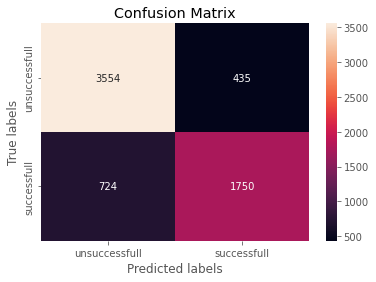

Accuracy score: 0.8206715147764196
Sensitivity score: 0.7073565076798707
f1-score: 0.7512341704228375
Precision score: 0.8009153318077803
Recall score: 0.7073565076798707


In [106]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred)

In [107]:
y_train_pred_final

Converted  Converted_Prob  LeadId  predicted
0             0        0.926517    7417          1
1             1        0.888379    1032          1
2             0        0.472254    6537          0
3             0        0.160708    7284          0
4             1        0.832044    3194          1
5             0        0.056747     712          0
6             0        0.167182    3947          0
7             1        0.402777    3436          0
8             0        0.062622    6609          0
9             0        0.036217    8013          0
10            0        0.818066    6080          1
11            1        0.863693    3665          1
12            1        0.591497    1050          1
13            0        0.035581    8706          0
14            0        0.036422    3962          0
15            1        0.684845    6162          1
16            1        0.320402    6710          0
17            0        0.064284    2175          0
18            0        0.333965    8231          0
19            1        0.762970    8886          1
20            0        0.355898    8690          0
21            1        0.516380    3686          1
22            1        0.981132    2914          1
23            1        0.908384    2714          1
24            0        0.208134     499          0
25            0        0.099992    8329          0
26            0        0.300437     504          0
27            0        0.517405    4985          1
28            1        0.211464    8963          0
29            0        0.005099    1835          0
30            0        0.445361    1756          0
31            1        0.448278    3049          0
32            0        0.136166    6436          0
33            0        0.074905     498          0
34            0        0.171224    6915          0
35            0        0.162098    3206          0
36            0        0.080858    6965          0
37            0        0.443394    4071          0
38            1        0.994058    4773          1
39            0        0.101318    6190          0
40            0        0.184741    8368          0
41            0        0.167833    3904          0
42            1        0.988437    8946          1
43            0        0.136166    5900          0
44            1        0.728770    8539          1
45            1        0.413693    2197          0
46            0        0.271407    1599          0
47            1        0.996871    7234          1
48            0        0.052506    4641          0
49            0        0.050197    8557          0
50            0        0.050197    7743          0
51            1        0.627005    5060          1
52            0        0.937777    8190          1
53            1        0.875785    5389          1
54            0        0.355420    2279          0
55            0        0.173294    8752          0
56            0        0.615061    2716          1
57            0        0.866867     561          1
58            1        0.992374     936          1
59            0        0.135390    3882          0
60            0        0.034799    4545          0
61            0        0.445739    6038          0
62            0        0.101171    8698          0
63            0        0.102996    6717          0
64            0        0.495333    3124          0
65            0        0.338207    2442          0
66            0        0.168905     543          0
67            0        0.032917     455          0
68            1        0.871247    5068          1
69            1        0.991889    6944          1
70            1        0.981912    7033          1
71            1        0.355898    8295          0
72            0        0.223083    6215          0
73            0        0.127858    1412          0
74            1        0.727810    4807          1
75            0        0.767671    7811          1
76            0        0.074949    8773          0
77            0        0.388

### Metrics beyond accuracy

In [108]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

### Sensitivity of final logistic regression model

In [109]:
TP / float(TP+FN)

0.7073565076798707

### Specificity of final logistic regression model

In [110]:
TN / float(TN + FP)

0.8909501128102282

Observations from above classification report
Accuracy is 82%, precision is 80% and recall is 71%
This is when cutoff set is 0.5
We will plot the ROC Curve in next steps and will also try to adjust cutoff to get better precision score

## Lets create data frame to store cutoff and train-test metrics

In [111]:
result_metrics = pd.DataFrame(columns=['cutoff','train_acc','train_sen','train_spec','train_prec',
                                      'test_acc','test_sen','test_spec','test_prec'])

## Plotting ROC Curve

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final['Converted'], 
                                         y_train_pred_final['Converted_Prob'], drop_intermediate = False )

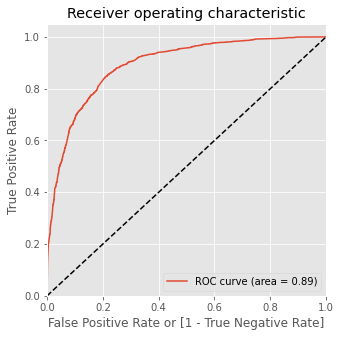

In [114]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])

## Finding Optimal Cutoff Point

### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
- We will try with various cutoff points and try to check which cutoff point gives more stable accuracy, sensitivity and precision score of train and test data
- We will use various cutoff points as - [0.35,0.36,0.38,0.4,0.41] and will compare the metrics

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.926517    7417          1    1    1    1    1    1    1   
1          1        0.888379    1032          1    1    1    1    1    1    1   
2          0        0.472254    6537          0    1    1    1    1    1    0   
3          0        0.160708    7284          0    1    1    0    0    0    0   
4          1        0.832044    3194          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    1    1    1    1  
1    1    1    1    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    1    0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382794  1.000000  0.000000
0.1   0.1  0.637011  0.972514  0.428930
0.2   0.2  0.767291  0.921584  0.671597
0.3   0.3  0.803652  0.867017  0.764352
0.4   0.4  0.816958  0.774454  0.843319
0.5   0.5  0.820672  0.707357  0.890950
0.6   0.6  0.814173  0.644301  0.919529
0.7   0.7  0.788179  0.536378  0.944347
0.8   0.8  0.763423  0.436136  0.966408
0.9   0.9  0.715457  0.278092  0.986713


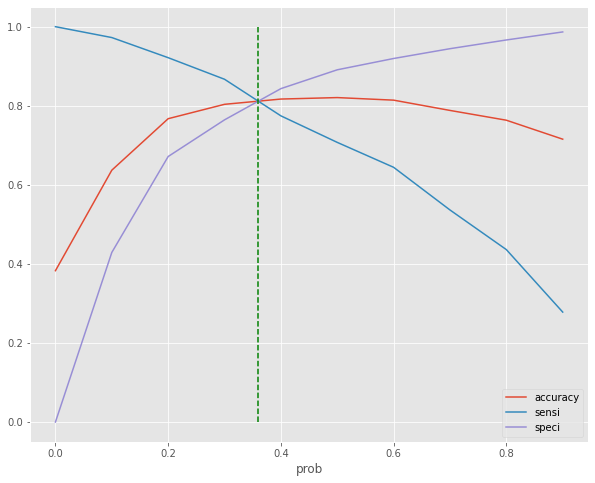

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,8))
plt.vlines(x=0.36, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

#### Observations from above plot
- Cutoff at 0.36 gives a good accuracy, sensitivity and specificity scores
- Also, the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
- So we will choose cut-off as 0.36 and generate lead scores

### With 0.36 as cut-off point lets check train and test scores

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.926517    7417          1    1    1    1    1    1    1   
1          1        0.888379    1032          1    1    1    1    1    1    1   
2          0        0.472254    6537          1    1    1    1    1    1    0   
3          0        0.160708    7284          0    1    1    0    0    0    0   
4          1        0.832044    3194          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    1    1    1    1  
1    1    1    1    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    1    0

In [119]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.813863530868018

In [120]:
confusion_train = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion_train

array([[3262,  727],
       [ 476, 1998]], dtype=int64)

In [121]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8075990299110751

In [123]:
# Let us calculate specificity
TN / (TN+FP)

0.8177488092253697

### Precision and Recall

In [124]:
#Lets calculate Precision
TP / (TP + FP)

0.7332110091743119

In [125]:
# Lets calculate recall
TP / (TP + FN)

0.8075990299110751

In [126]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7332110091743119

In [127]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8075990299110751

In [128]:
# F1-Score
f1_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])

0.7686093479515291

In [129]:
train_acc = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[0,'cutoff']=0.36
result_metrics.loc[0,'train_acc'] = round(train_acc,2)
result_metrics.loc[0,'train_sen'] = round(train_sen,2)
result_metrics.loc[0,'train_spec'] = round(train_spec,2)
result_metrics.loc[0,'train_prec'] = round(train_prec,2)

### Observations from above
- With cut-off point as 0.36, we have train accuracy of 81.4%, Sensitivity of 81% and Precision of 73%

## Precision and recall tradeoff

In [130]:
y_train_pred_final['Converted'], y_train_pred_final['predicted']

(0       0
 1       1
 2       0
 3       0
 4       1
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      1
 13      0
 14      0
 15      1
 16      1
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      0
 25      0
 26      0
 27      0
 28      1
 29      0
 30      0
 31      1
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      1
 39      0
 40      0
 41      0
 42      1
 43      0
 44      1
 45      1
 46      0
 47      1
 48      0
 49      0
 50      0
 51      1
 52      0
 53      1
 54      0
 55      0
 56      0
 57      0
 58      1
 59      0
 60      0
 61      0
 62      0
 63      0
 64      0
 65      0
 66      0
 67      0
 68      1
 69      1
 70      1
 71      1
 72      0
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      0
 87      0
 88      0
 89      0
 90      1

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], 
                                          y_train_pred_final['Converted_Prob'])

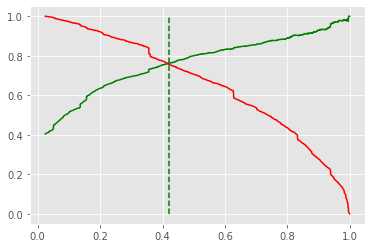

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

## Making predictions on the test set

In [133]:
X_train_sm.drop(columns=['const'],inplace=True)
rfe_col = list(X_train_sm.columns)
print('final list of columns: \n{0}'.format(rfe_col))

final list of columns: 
['TotalWebsiteTime', 'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat', 'LeadSource_Welingak Website', 'DndEmail_Yes', 'LastActivity_Email Opened', 'LastActivity_Others', 'LastActivity_SMS Sent', 'Occupation_Other', 'Occupation_Working Professional', 'LastNotableActivity_Had a Phone Conversation', 'LastNotableActivity_Modified', 'LastNotableActivity_Olark Chat Conversation', 'LastNotableActivity_Unreachable', 'LastNotableActivity_Unsubscribed']


In [134]:
#add constant to X_test_scaled
X_test_sm = sm.add_constant(X_test_scaled_rfe[rfe_col])
X_test_sm.head()

const  TotalWebsiteTime  LeadOrigin_Lead Add Form  \
4871    1.0          1.907826                         0   
1949    1.0         -0.888425                         0   
5628    1.0          1.429927                         0   
8666    1.0         -0.846472                         0   
1025    1.0          0.838939                         0   

      LeadSource_Olark Chat  LeadSource_Welingak Website  DndEmail_Yes  \
4871                      0                            0             0   
1949                      1                            0             0   
5628                      0                            0             0   
8666                      0                            0             0   
1025                      0                            0             0   

      LastActivity_Email Opened  LastActivity_Others  LastActivity_SMS Sent  \
4871                          1                    0                      0   
1949                          0                    0                      1   
5628                          0                    0                      1   
8666                          1                    0                      0   
1025                          0                    0                      0   

      Occupation_Other  Occupation_Working Professional  \
4871                 0                                0   
1949                 1                                0   
5628                 1                                0   
8666                 1                                0   
1025                 0                                0   

      LastNotableActivity_Had a Phone Conversation  \
4871                                             0   
1949                                             0   
5628                                             0   
8666                                             0   
1025                                             0   

      LastNotableActivity_Modified  \
4871                             0   
1949                             1   
5628                             1   
8666                             1   
1025                             0   

      LastNotableActivity_Olark Chat Conversation  \
4871                                            0   
1949                                            0   
5628                                            0   
8666                                            0   
1025                                            1   

      LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  
4871                                0                                 0  
1949                                0                                 0  
5628                                0                                 0  
8666                                0                                 0  
1025                                0                                 0

In [135]:
# Making predictions on the test set

y_test_pred = lr.predict(X_test_sm)

In [136]:
y_test_pred[:10]

4871    0.782808
1949    0.211415
5628    0.505193
8666    0.025206
1025    0.180797
2427    0.868888
5867    0.248897
6557    0.846667
2854    0.971077
6177    0.827058
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

0
4871  0.782808
1949  0.211415
5628  0.505193
8666  0.025206
1025  0.180797

In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

Converted  LeadId         0
0          0    4871  0.782808
1          1    1949  0.211415
2          0    5628  0.505193
3          0    8666  0.025206
4          1    1025  0.180797

In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [145]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [146]:
# Let's see the head of y_pred_final
y_pred_final.head()

LeadId  Converted  Converted_Prob
0    4871          0        0.782808
1    1949          1        0.211415
2    5628          0        0.505193
3    8666          0        0.025206
4    1025          1        0.180797

## Using cutoff as 0.36 and apply on test data and check if lead will convert or not

In [147]:
y_pred_final['predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

LeadId  Converted  Converted_Prob  predicted
0    4871          0        0.782808          1
1    1949          1        0.211415          0
2    5628          0        0.505193          1
3    8666          0        0.025206          0
4    1025          1        0.180797          0

In [148]:

# Let's check the overall accuracy.
accuracy_score(y_pred_final['Converted'], y_pred_final['predicted'])

0.8137856369541682

In [149]:
0.8137856369541682
# Let's check the f1-score.
f1_score(y_pred_final['Converted'], y_pred_final['predicted'])

0.7710736468500443

In [150]:
confusion_test = confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted'])
confusion_test

array([[1386,  300],
       [ 216,  869]], dtype=int64)

In [151]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009216589861751

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.8220640569395018

In [154]:
# Lets calculate Precision
TP / (TP + FP)

0.7433704020530368

In [155]:
# Lets calcualte Recall
TP / (TP + FN)

0.8009216589861751

In [156]:
test_acc = accuracy_score(y_pred_final['Converted'], y_pred_final['predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[0,'test_acc'] = round(test_acc,2)
result_metrics.loc[0,'test_sen'] = round(test_sen,2)
result_metrics.loc[0,'test_spec'] = round(test_spec,2)
result_metrics.loc[0,'test_prec'] = round(test_prec,2)

#### Observations from above
- With cut-off point as 0.36, we have test accuracy of 81.4%, Sensivity of 80.1% and Precision of 74.3%

In [157]:
result_metrics

cutoff train_acc train_sen train_spec train_prec test_acc test_sen  \
0   0.36      0.81      0.81       0.82       0.73     0.81      0.8   

  test_spec test_prec  
0      0.82      0.74

# Lets check for optimal cut-off point

### With 0.35 as cut-off point lets check metrics

In [158]:
cutoff1_train = y_train_pred_final.copy()

In [159]:

cutoff1_train['final_predicted'] = cutoff1_train['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)

cutoff1_train.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.926517    7417          1    1    1    1    1    1    1   
1          1        0.888379    1032          1    1    1    1    1    1    1   
2          0        0.472254    6537          1    1    1    1    1    1    0   
3          0        0.160708    7284          0    1    1    0    0    0    0   
4          1        0.832044    3194          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1                1  
1    1    1    1    0                1  
2    0    0    0    0                1  
3    0    0    0    0                0  
4    1    1    1    0                1

In [160]:

# Let's check the overall accuracy.
accuracy_score(cutoff1_train['Converted'], cutoff1_train['final_predicted'])

0.8116973541698902

In [161]:

confusion_train1 = confusion_matrix(cutoff1_train['Converted'], cutoff1_train['final_predicted'])
confusion_train1

array([[3158,  831],
       [ 386, 2088]], dtype=int64)

In [162]:
TP = confusion_train1[1,1] # true positive 
TN = confusion_train1[0,0] # true negatives
FP = confusion_train1[0,1] # false positives
FN = confusion_train1[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8439773645917542

In [164]:
# Let us calculate specificity
TN / (TN+FP)

0.7916771120581599

In [165]:
# Lets calculate Precision
TP / (TP + FP)

0.7153134635149023

In [166]:

# Lets calculate recall
TP / (TP + FN)

0.8439773645917542

In [167]:

f1_score(cutoff1_train['Converted'],cutoff1_train['final_predicted'])

0.7743371036528833

In [168]:
train_acc = accuracy_score(cutoff1_train['Converted'], cutoff1_train['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[1,'cutoff']=0.35
result_metrics.loc[1,'train_acc'] = round(train_acc,2)
result_metrics.loc[1,'train_sen'] = round(train_sen,2)
result_metrics.loc[1,'train_spec'] = round(train_spec,2)
result_metrics.loc[1,'train_prec'] = round(train_prec,2)

In [169]:
result_metrics

cutoff train_acc train_sen train_spec train_prec test_acc test_sen  \
0   0.36      0.81      0.81       0.82       0.73     0.81      0.8   
1   0.35      0.81      0.84       0.79       0.72      NaN      NaN   

  test_spec test_prec  
0      0.82      0.74  
1       NaN       NaN

#### Observations from above
- With cut-off point as 0.35, we have train accuracy of 81.2%, Sensitivity of 84.4% and Precision of 71.5%

### Making predictions on the test set

In [170]:
cutoff1_test = y_pred_final.copy()

In [171]:
cutoff1_test['final_predicted'] = cutoff1_test['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [172]:

cutoff1_test.head()

LeadId  Converted  Converted_Prob  predicted  final_predicted
0    4871          0        0.782808          1                1
1    1949          1        0.211415          0                0
2    5628          0        0.505193          1                1
3    8666          0        0.025206          0                0
4    1025          1        0.180797          0                0

In [173]:
# Let's check the overall accuracy.
accuracy_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])

0.8080115481775533

In [174]:
# Let's check the f1-score.
f1_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])

0.7722602739726027

In [175]:
confusion_test1 = confusion_matrix(cutoff1_test['Converted'], cutoff1_test['final_predicted'])
confusion_test1

array([[1337,  349],
       [ 183,  902]], dtype=int64)

In [176]:
TP = confusion_test1[1,1] # true positive 
TN = confusion_test1[0,0] # true negatives
FP = confusion_test1[0,1] # false positives
FN = confusion_test1[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8313364055299539

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.7930011862396203

In [179]:

# Lets calculate precision
TP/ float(TP+FP)

0.7210231814548361

In [180]:
# Lets calculate recall
TP / float(TP + FN)

0.8313364055299539

In [181]:
test_acc = accuracy_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[1,'test_acc'] = round(test_acc,2)
result_metrics.loc[1,'test_sen'] = round(test_sen,2)
result_metrics.loc[1,'test_spec'] = round(test_spec,2)
result_metrics.loc[1,'test_prec'] = round(test_prec,2)

#### Observations from above
- With cut-off point as 0.35, we have test accuracy of 80.8%, Sensivity of 83.13% and Precision of 80.3%

## Lets take the cutoff as 0.37 and check for the accuracy, specificty and precision

In [182]:

y_train_2 = y_train_pred_final.copy()

In [183]:

y_train_2['final_predicted'] = y_train_2['Converted_Prob'].map( lambda x: 1 if x > 0.37 else 0)

y_train_2.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.926517    7417          1    1    1    1    1    1    1   
1          1        0.888379    1032          1    1    1    1    1    1    1   
2          0        0.472254    6537          1    1    1    1    1    1    0   
3          0        0.160708    7284          0    1    1    0    0    0    0   
4          1        0.832044    3194          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1                1  
1    1    1    1    0                1  
2    0    0    0    0                1  
3    0    0    0    0                0  
4    1    1    1    0                1

In [184]:
# Let's check the overall accuracy.
accuracy_score(y_train_2['Converted'], y_train_2['final_predicted'])

0.8121615348909176

In [185]:
confusion2 = confusion_matrix(y_train_2['Converted'], y_train_2['final_predicted'])
confusion2

array([[3292,  697],
       [ 517, 1957]], dtype=int64)

In [186]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [187]:

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7910266774454325

In [188]:

# Let us calculate specificity
TN / float(TN+FP)

0.8252694911005265

In [189]:
# Lets calculate Precision
TP/ float(TP+FP)

0.7373775433308214

In [190]:
# Lets call recall
TP / float(TP + FN)

0.7910266774454325

In [191]:

f1_score(y_train_2['Converted'],y_train_2['final_predicted'])

0.763260530421217

In [192]:
train_acc = accuracy_score(y_train_2['Converted'], y_train_2['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[2,'cutoff']=0.37
result_metrics.loc[2,'train_acc'] = round(train_acc,2)
result_metrics.loc[2,'train_sen'] = round(train_sen,2)
result_metrics.loc[2,'train_spec'] = round(train_spec,2)
result_metrics.loc[2,'train_prec'] = round(train_prec,2)

#### Observations from above
- With cut-off point as 0.51, we have train accuracy of 81.2%, Sensitivity of 79.1% and Precision of 73.7%

### Making predictions on the test set

In [193]:

cutoff2_test = y_pred_final.copy()

In [194]:
cutoff2_test['final_predicted'] = cutoff2_test['Converted_Prob'].map(lambda x: 1 if x > 0.37 else 0)
cutoff2_test.head()

LeadId  Converted  Converted_Prob  predicted  final_predicted
0    4871          0        0.782808          1                1
1    1949          1        0.211415          0                0
2    5628          0        0.505193          1                1
3    8666          0        0.025206          0                0
4    1025          1        0.180797          0                0

In [195]:

# Let's check the overall accuracy.
accuracy_score(cutoff2_test['Converted'], cutoff2_test['final_predicted'])

0.8123421147600144

In [196]:
# Let's check the f1-score.
f1_score(cutoff2_test['Converted'], cutoff2_test['final_predicted'])

0.7670250896057348

In [197]:
confusion_test2 = confusion_matrix(cutoff2_test['Converted'], cutoff2_test['final_predicted'])
confusion_test2

array([[1395,  291],
       [ 229,  856]], dtype=int64)

In [198]:

TP = confusion_test2[1,1] # true positive 
TN = confusion_test2[0,0] # true negatives
FP = confusion_test2[0,1] # false positives
FN = confusion_test2[1,0] # false negatives

In [199]:

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7889400921658987

In [200]:

# Let us calculate specificity
TN / float(TN+FP)

0.8274021352313167

In [201]:

# Lets calculate precision
TP/ float(TP+FP)

0.7462946817785527

In [202]:

# Lets calculate recall
TP / float(TP + FN)

0.7889400921658987

In [203]:
test_acc = accuracy_score(cutoff2_test['Converted'], cutoff2_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[2,'test_acc'] = round(test_acc,2)
result_metrics.loc[2,'test_sen'] = round(test_sen,2)
result_metrics.loc[2,'test_spec'] = round(test_spec,2)
result_metrics.loc[2,'test_prec'] = round(test_prec,2)

#### Observations from above
- With cut-off point as 0.37, we have test accuracy of 81.2%, Sensitivity of 78.9% and Precision of 74.6%

In [204]:

result_metrics

cutoff train_acc train_sen train_spec train_prec test_acc test_sen  \
0   0.36      0.81      0.81       0.82       0.73     0.81      0.8   
1   0.35      0.81      0.84       0.79       0.72     0.81     0.83   
2   0.37      0.81      0.79       0.83       0.74     0.81     0.79   

  test_spec test_prec  
0      0.82      0.74  
1      0.79      0.72  
2      0.83      0.75

#### Observations from above result metrics
- Train and test accuracy, sensitivity and precision scores are almost similar for cutoff at 0.35
- So we will choose cutoff as 0.35 and will generate the lead score

# Lead Score on Train Data

In [205]:
y_train_score_final = cutoff1_train.copy()
y_train_score_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.926517    7417          1    1    1    1    1    1    1   
1          1        0.888379    1032          1    1    1    1    1    1    1   
2          0        0.472254    6537          1    1    1    1    1    1    0   
3          0        0.160708    7284          0    1    1    0    0    0    0   
4          1        0.832044    3194          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1                1  
1    1    1    1    0                1  
2    0    0    0    0                1  
3    0    0    0    0                0  
4    1    1    1    0                1

In [206]:
y_train_score_final['Lead_Score'] = y_train_score_final['Converted_Prob'] * 100
y_train_score_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.926517    7417          1    1    1    1    1    1    1   
1          1        0.888379    1032          1    1    1    1    1    1    1   
2          0        0.472254    6537          1    1    1    1    1    1    0   
3          0        0.160708    7284          0    1    1    0    0    0    0   
4          1        0.832044    3194          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    1    1    1    1                1   92.651679  
1    1    1    1    0                1   88.837938  
2    0    0    0    0                1   47.225438  
3    0    0    0    0                0   16.070783  
4    1    1    1    0                1   83.204449

# Lead Score on Test Data

In [207]:

y_test_score_final = cutoff1_test.copy()
y_test_score_final.head()

LeadId  Converted  Converted_Prob  predicted  final_predicted
0    4871          0        0.782808          1                1
1    1949          1        0.211415          0                0
2    5628          0        0.505193          1                1
3    8666          0        0.025206          0                0
4    1025          1        0.180797          0                0

In [208]:
y_test_score_final['Lead_Score'] = y_test_score_final['Converted_Prob'] * 100
y_test_score_final.head()

LeadId  Converted  Converted_Prob  predicted  final_predicted  Lead_Score
0    4871          0        0.782808          1                1   78.280807
1    1949          1        0.211415          0                0   21.141528
2    5628          0        0.505193          1                1   50.519282
3    8666          0        0.025206          0                0    2.520601
4    1025          1        0.180797          0                0   18.079728

# Lets Combine Tain and Test Data to get the lead score on complete data set

In [209]:
print('shape of train data set: {0}'.format(y_train_score_final.shape))
print('shape of test data set: {0}'.format(y_test_score_final.shape))

shape of train data set: (6463, 16)
shape of test data set: (2771, 6)


In [210]:

## Lets keep only relevant columns in train data set
y_train_score_final = y_train_score_final[['LeadId','Converted',
                                           'Converted_Prob','predicted','final_predicted','Lead_Score']]
y_train_score_final.head()

LeadId  Converted  Converted_Prob  predicted  final_predicted  Lead_Score
0    7417          0        0.926517          1                1   92.651679
1    1032          1        0.888379          1                1   88.837938
2    6537          0        0.472254          1                1   47.225438
3    7284          0        0.160708          0                0   16.070783
4    3194          1        0.832044          1                1   83.204449

In [211]:
lead_score_combined = pd.concat([y_train_score_final,y_test_score_final],axis=0,join='outer')
print('shape of combined dataset: {0}'.format(lead_score_combined.shape))
lead_score_combined.head()

shape of combined dataset: (9234, 6)


LeadId  Converted  Converted_Prob  predicted  final_predicted  Lead_Score
0    7417          0        0.926517          1                1   92.651679
1    1032          1        0.888379          1                1   88.837938
2    6537          0        0.472254          1                1   47.225438
3    7284          0        0.160708          0                0   16.070783
4    3194          1        0.832044          1                1   83.204449

## Evaluate the Model with others algorithms

In [212]:
from lazypredict.Supervised import LazyClassifier

In [230]:
#X_train_scaled.head()
#X_test_scaled.head()
#y_train
#y_test

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
models


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.86it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.83               0.82     0.82      0.83   
LGBMClassifier                     0.83               0.81     0.81      0.83   
XGBClassifier                      0.82               0.81     0.81      0.82   
SVC                                0.83               0.81     0.81      0.82   
LogisticRegression                 0.82               0.79     0.79      0.81   
CalibratedClassifierCV             0.81               0.79     0.79      0.81   
LinearSVC                          0.81               0.79     0.79      0.81   
LinearDiscriminantAnalysis         0.81               0.79     0.79      0.81   
RidgeClassifierCV                  0.81               0.79     0.79      0.81   
RidgeClassifier                    0.81               0.79     0.79      0.81   
NearestCentroid                    0.80               0.79     0.79      0.80   
NuSVC                              0.81               0.78     0.78      0.81   
BernoulliNB                        0.79               0.78     0.78      0.79   
KNeighborsClassifier               0.80               0.78     0.78      0.80   
SGDClassifier                      0.79               0.78     0.78      0.79   
BaggingClassifier                  0.79               0.77     0.77      0.79   
RandomForestClassifier             0.79               0.77     0.77      0.79   
LabelSpreading                     0.78               0.76     0.76      0.78   
LabelPropagation                   0.78               0.76     0.76      0.78   
ExtraTreesClassifier               0.78               0.75     0.75      0.77   
DecisionTreeClassifier             0.77               0.75     0.75      0.76   
PassiveAggressiveClassifier        0.75               0.74     0.74      0.75   
ExtraTreeClassifier                0.76               0.74     0.74      0.76   
Perceptron                         0.73               0.72     0.72      0.73   
QuadraticDiscriminantAnalysis      0.72               0.68     0.68      0.71   
GaussianNB                         0.72               0.65     0.65      0.68   
DummyClassifier                    0.61               0.50     0.50      0.46   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.30  
LGBMClassifier                       0.12  
XGBClassifier                        0.35  
SVC                                  1.80  
LogisticRegression                   0.08  
CalibratedClassifierCV               2.59  
LinearSVC                            0.61  
LinearDiscriminantAnalysis           0.08  
RidgeClassifierCV                    0.05  
RidgeClassifier                      0.04  
NearestCentroid                      0.02  
NuSVC                                2.45  
BernoulliNB                          0.03  
KNeighborsClassifier                 0.35  
SGDClassifier                        0.06  
BaggingClassifier                    0.17  
RandomForestClassifier               0.46  
LabelSpreading                       2.85  
LabelPropagation                     2.43  
ExtraTreesClassifier                 0.49  
DecisionTreeClassifier               0.04  
PassiveAggressiveClassifier          0.05  
ExtraTreeClassifier                  0.02  
Perceptron                           0.02  
QuadraticDiscriminantAnalysis        0.05  
GaussianNB                           0.03  
DummyClassifier                      0.02

## Hyperparameters Tunning

### Using Grid Search

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid=grid_space, cv=3, scoring='accuracy')
model_grid = grid.fit(X_train_scaled_rfe, y_train)


In [234]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}
Best score is: 0.8316576437226089


In [240]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

lr = LogisticRegression()
gridsearch = GridSearchCV(lr, hyperparameters)
best_model_grid = gridsearch.fit(X_train_scaled_rfe, y_train)

print(best_model_grid.best_estimator_)


LogisticRegression(solver='liblinear')


In [241]:
print('Best hyperparameters are: '+str(best_model_grid.best_params_))
print('Best score is: '+str(best_model_grid.best_score_))

Best hyperparameters are: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best score is: 0.8200567954621096


#### Using Random Search

In [235]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [237]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_scaled_rfe, y_train)

In [238]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 360}
Best score is: 0.8315032519221779
